In [18]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

from sklearn.metrics import roc_auc_score

In [19]:
df = pd.read_csv("/Users/tyler/Portfolio/creditcard.csv")

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [21]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [22]:
# See how the data looks
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
146294,87591.0,1.563804,-2.165786,-0.214081,-0.297594,-1.892682,-0.106865,-1.066891,0.026782,0.912337,...,0.165806,0.093075,0.023132,-0.090248,-0.466793,-0.322289,-0.007849,0.008610,295.50,0
283752,171846.0,1.979143,-0.385864,-0.245667,0.515162,-0.770363,-0.579361,-0.578186,-0.078505,1.427551,...,0.193517,0.832510,0.107934,0.009447,-0.078599,-0.212422,0.043669,-0.036208,9.99,0
137143,82033.0,1.508223,-1.199004,0.335936,-1.694404,-1.221495,0.196854,-1.354428,0.072049,-1.791351,...,-0.075252,0.137445,-0.171660,-0.829800,0.463860,-0.050724,0.044211,0.008235,27.70,0
58038,48201.0,-0.820112,-0.335657,1.411853,-0.666699,-1.006461,0.731439,-1.097363,-2.451148,0.211354,...,-1.329703,-0.182392,-0.313302,0.104110,0.765455,0.851666,-0.067083,0.223877,241.57,0
85043,60574.0,1.152187,0.093163,0.572282,0.513078,-0.402582,-0.330397,-0.158005,0.106632,-0.124694,...,-0.170667,-0.540393,0.184086,0.199549,0.061773,0.096180,-0.021490,0.006610,5.49,0


In [23]:
# Check NA
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


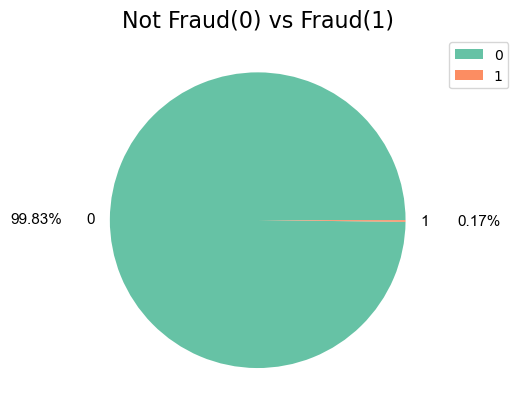

In [24]:
df_Class_count = pd.DataFrame(df["Class"].value_counts()).reset_index()
df_Class_count.columns = ["Class", "Freq"]

plt.title(label="Not Fraud(0) vs Fraud(1)", 
    fontdict={"fontsize":16})

plt.pie(df_Class_count["Freq"], labels = df_Class_count["Class"],
        pctdistance = 1.5, 
        labeldistance = 1.1,
        autopct=lambda x: f'{x:.2f}%',
        textprops={"family": "Arial", "size": 11},
        radius = 1,
        colors=sns.color_palette('Set2'),
        )
plt.legend(loc="best", bbox_to_anchor=(1,1))

Data is highly imbalanced with respect with target variable 'Class', since 0.17% of transaction is fraud in total.

In [26]:
X = df.iloc[:,0:30]
Y = df.iloc[:,-1]
Random_State = 2023

In [35]:
X.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=Random_State)

X_train, X_valid, Y_train, Y_valid  = train_test_split(X_train, Y_train, test_size=0.25, random_state=Random_State)

# 60/20/20 split

In [32]:
rand_clf = RandomForestClassifier(random_state=Random_State)

In [33]:
rand_clf.fit(X_train, Y_train)

RandomForestClassifier(random_state=2023)

In [34]:
pred_clf = rand_clf.predict(X_valid)

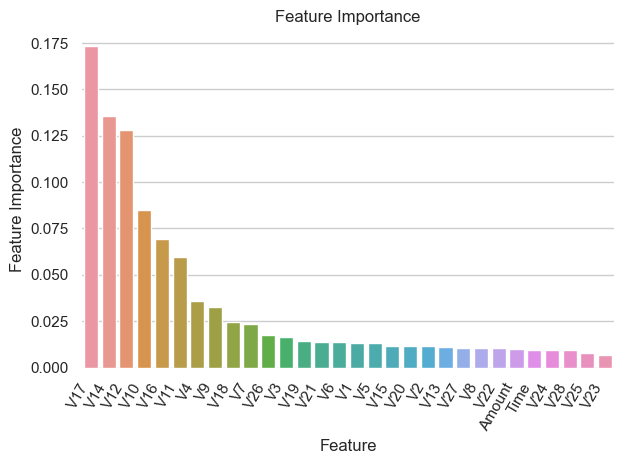

In [48]:
tmp_clf = pd.DataFrame({'Feature': X.columns, 'Feature importance': rand_clf.feature_importances_})
tmp_clf = tmp_clf.sort_values(by='Feature importance',ascending=False)

sns.set_theme(style="whitegrid")

fig, ax = plt.subplots()
sns.barplot(x="Feature", y="Feature importance", data=tmp_clf)

plt.title("Feature Importance")
ax.set(xlabel="Feature", ylabel="Feature Importance")

sns.despine(left=True, right = True , top = True, bottom=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, horizontalalignment='right')
fig.tight_layout()

In [43]:
roc_auc_score(Y_valid.values, pred_clf)

0.8921128951052808

In [44]:
Ada_clf = AdaBoostClassifier(n_estimators=100, random_state=Random_State)

In [45]:
Ada_clf.fit(X_train, Y_train)

AdaBoostClassifier(n_estimators=100, random_state=2023)

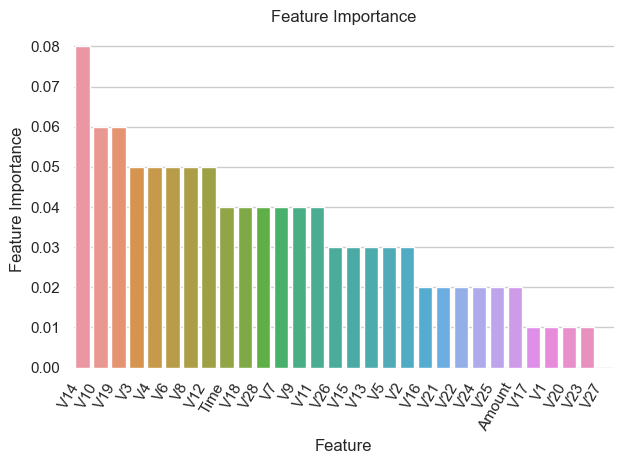

In [49]:
tmp_Ada = pd.DataFrame({'Feature': X.columns, 'Feature importance': Ada_clf.feature_importances_})
tmp_Ada = tmp_Ada.sort_values(by='Feature importance',ascending=False)

sns.set_theme(style="whitegrid")

fig, ax = plt.subplots()
sns.barplot(x="Feature", y="Feature importance", data=tmp_Ada)

plt.title("Feature Importance")
ax.set(xlabel="Feature", ylabel="Feature Importance")

sns.despine(left=True, right = True , top = True, bottom=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, horizontalalignment='right')
fig.tight_layout()

In [58]:
pred_Ada = Ada_clf.predict(X_valid)

In [59]:
roc_auc_score(Y_valid.values, pred_Ada)

0.8919458180739759

In [46]:
Cbc_clf = CatBoostClassifier(iterations = 500,
                             od_wait=100
                             ,random_seed = Random_State,)

In [47]:
Cbc_clf.fit(X_train, Y_train, verbose=False)

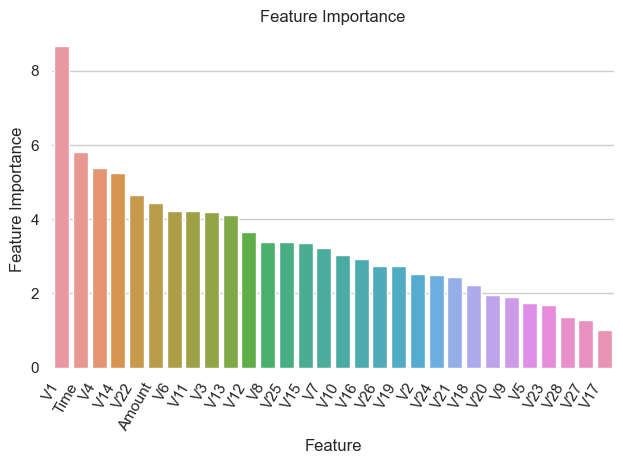

In [52]:
tmp_Cbc = pd.DataFrame({'Feature': X.columns, 'Feature importance': Cbc_clf.feature_importances_})
tmp_Cbc = tmp_Cbc.sort_values(by='Feature importance',ascending=False)

sns.set_theme(style="whitegrid")

fig, ax = plt.subplots()
sns.barplot(x="Feature", y="Feature importance", data=tmp_Cbc)

plt.title("Feature Importance")
ax.set(xlabel="Feature", ylabel="Feature Importance")

sns.despine(left=True, right = True , top = True, bottom=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, horizontalalignment='right')
fig.tight_layout()

In [83]:
pred_Cbc = Cbc_clf.predict(X_valid)

In [85]:
roc_auc_score(Y_valid.values, pred_Cbc)

0.8970060623616312

In [50]:
dtrain = xgb.DMatrix(X_train, Y_train.values)
dvalid = xgb.DMatrix(X_valid, Y_valid.values)
dtest = xgb.DMatrix(X_test, Y_test.values)

watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = Random_State

In [ ]:
model = xgb.train(params, 
                dtrain, 
                1000, 
                evals = watchlist, 
                early_stopping_rounds=50, 
                maximize=True, 
                verbose_eval=50)

[20:12:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1667849653518/work/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	train-auc:0.86326	valid-auc:0.86749
[50]	train-auc:0.92639	valid-auc:0.93594
[100]	train-auc:0.93248	valid-auc:0.95022
[150]	train-auc:0.96907	valid-auc:0.98326
[200]	train-auc:0.98785	valid-auc:0.98955


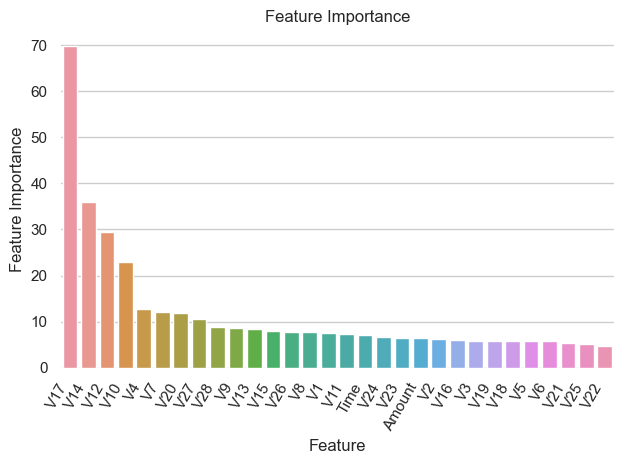

In [53]:
feature_important = model.get_score(importance_type='gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

tmp_gbm = pd.DataFrame({'Feature': keys, 'Feature importance': values}).sort_values(by='Feature importance',ascending=False)

sns.set_theme(style="whitegrid")

fig, ax = plt.subplots()
sns.barplot(x="Feature", y="Feature importance", data=tmp_gbm)

plt.title("Feature Importance")
ax.set(xlabel="Feature", ylabel="Feature Importance")

sns.despine(left=True, right = True , top = True, bottom=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, horizontalalignment='right')
fig.tight_layout()

In [93]:
pred_xgb = model.predict(dtest)

In [94]:
roc_auc_score(Y_test.values, pred_xgb)

0.980369660524218

## Conclusion

This dataset consists of one target variable and thirty explanatory variables.
The target variable 'Class' has two indicators: 0 and 1, which denote 'Not Fraud transaction' and 'Fraud transaction', respectively.

We can observe that this dataset is highly imbalanced, with only 0.17% of rows belonging to fraudulent transactions.
This could be because credit card fraud is a rare occurrence, and cardholders may not always be aware of fraudulent charges on their bill.
To avoid overfitting, the data was split into three sets: train, validation, and test.

Four ensemble methods were implemented: Random Forest classifier, AdaBoost classifier, CatBoost classifier, and XGBoost model.

Additionally, ROC_AUC scoring was conducted, as it is a suitable method for measuring accuracy in imbalanced data.

Although the XGBoost model performed with a great score of 0.98, there is still room for improvement
such as over-sampling, under-sampling, applying other ensemble models, etc.